You are suggested to use suitable descriptive statistics and visualisation to better understand the data you have available. You need to consider various data pre-processing techniques such as data transformation, discretisation, cleaning, normalisation, standardisation, smoothing, feature construction and use them if necessary.


# Proprocessing

**Steps**
* Step 1: Find columns whose results are all 0 or 1, and remove them from the dataframe
* Step 2: Find columns where most of the rows are the same value, and remove these columsn from the dataframe
* Step 3: Find duplicate columns and remove one of them from the dataframe
* Step 4: Rescale columns whose value range is smaller than (0,1) by using MinMaxScaler
* Step 5: Normalise columns with sparse data (i.e. with lots of "0"s)
* Step 6: Standardise Data with `StandardScaler`  and numpy's `log` transform function
* Step 7: Discretization with `KBinsDiscretizer` or `Binarizer` (to be done)

In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
dataset = pd.read_csv("Datasets/train_imperson_without4n7_balanced_data.csv")
df = dataset.iloc[:,0:152] # the dataset without the last column (the prediction target)
target = dataset.iloc[:,152]
df.head()

,1,2,3,5,6,8,9,10,11,12,...,145,146,147,148,149,150,151,152,153,154
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0.0


### Step 1: Find columns whose results are all 0 or 1, and remove them from the dataframe
The new dataframe is called `df3`

In [79]:
df2 = df.loc[:,(df!=0).any()]
df3 = df2.loc[:,(df2!=1).any()]
print(df3.shape)
df3.head()

(97044, 78)


,5,6,8,9,14,15,16,18,20,26,...,133,138,140,141,142,143,144,145,146,154
0,0.000066,0.000066,0.009150,0.009150,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000014,0.000014,0.000000,0.000000,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035528,0.035528,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005128,0.005128,0.094771,0.094771,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035116,0.035116,0.070588,0.070588,1,1,1,1,1,1,...,0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 2: Find columns where most of the rows are the same value, and remove these columsn from the dataframe
The new dataframe after this step is called `df4`

In [80]:
from collections import Counter
headers = list(df3.columns.values)
remove_col_list = []

for header in headers:
    # if the most frequent value of the column fills more than 99.94% of the column, remove it from the dataset
    if Counter(df[header]).most_common()[0][1] >= (df3.shape[0] - 50):
        remove_col_list.append(header)
        print("column " + header+ "'s value distribution is "+str(Counter(df[header])))

column 14's value distribution is Counter({1: 97023, 0: 21})
column 15's value distribution is Counter({1: 97023, 0: 21})
column 16's value distribution is Counter({1: 97023, 0: 21})
column 18's value distribution is Counter({1: 97023, 0: 21})
column 20's value distribution is Counter({1: 97023, 0: 21})
column 26's value distribution is Counter({1: 97023, 0: 21})
column 29's value distribution is Counter({1: 97023, 0: 21})
column 43's value distribution is Counter({1: 97023, 0: 21})
column 52's value distribution is Counter({1: 97023, 0: 21})
column 62's value distribution is Counter({1: 97023, 0: 21})
column 83's value distribution is Counter({0: 97042, 1: 2})
column 84's value distribution is Counter({0: 97038, 1: 6})
column 86's value distribution is Counter({0: 97036, 1: 8})
column 88's value distribution is Counter({0.0: 97038, 0.03125: 3, 0.46875: 2, 0.375: 1})
column 89's value distribution is Counter({1: 97023, 0: 21})
column 97's value distribution is Counter({0: 97043, 1: 1})

In [81]:
# df4 is the dataframe after dropping these columns where the most frequent value of the column fills 
# the majority of their rows
df4= df3.drop(remove_col_list,axis=1)
print(df4.shape)
print(df4.columns.values)

(97044, 56)
['5' '6' '8' '9' '38' '47' '48' '50' '51' '61' '64' '66' '67' '68' '70'
 '71' '72' '73' '75' '76' '77' '78' '79' '80' '82' '90' '93' '94' '98'
 '104' '106' '107' '108' '109' '110' '112' '118' '119' '120' '121' '122'
 '123' '125' '126' '127' '128' '129' '130' '140' '141' '142' '143' '144'
 '145' '146' '154']


### Step 3: Find duplicate columns and remove one of them from the dataframe
The new dataframe after this step is called `df5`

We can remove one of columns from each of the pairs below because they are duplicates of each other:
* column"5" and "6"
* column 8" and "9"
* column "145" and "146"

In [82]:
print(sum(df4["5"] == df4["6"]) == df4.shape[0])
print(sum(df4["8"] == df4["9"]) == df4.shape[0])
print(sum(df4["145"]==df4["146"]) == df4.shape[0])

True
True
True


In [83]:
df5= df4.drop(['5','8','145','48'],axis=1)
df5.shape

(97044, 52)

### Step 4: Rescale columns whose value range is smaller than (0,1) by using `MinMaxScaler`

It is fine to do this step before normalization because there is no negative values in the dataframe

In [84]:
min_max_dict = {}
col_to_rescale = []
col_not_rescaled = []
for i in df5.columns.values:
    min_max_dict[i] = [df5[i].min(),df5[i].max()] # I've checked and seen that all columns in this dataframe is within the range (0,1)
    if df5[i].min() != 0 or df5[i].max()!=1:
        col_to_rescale.append(i)
    else:
        col_not_rescaled.append(i)

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = df5[col_to_rescale].values
rescaledX = scaler.fit_transform(X)

In [96]:
# join the scaled data back to the unscaled columns, the result is a dataframe df_with_rescaled_cols
df_rescaled_only = pd.DataFrame(rescaledX,columns=col_to_rescale)
df_with_rescaled_cols = pd.concat([df_rescaled_only,df5[col_not_rescaled]], axis=1)
# reorder columns to be smallest to biggest
df_with_rescaled_cols = df_with_rescaled_cols.reindex(sorted(df_with_rescaled_cols.columns, key=lambda x: float(x)), axis=1)

In [99]:
# take a look at the skewness of these columns
# * skewness = 0 : normally distributed.
# * skewness > 0 : more weight in the left tail of the distribution.
# * skewness < 0 : more weight in the right tail of the distribution. 

df_with_rescaled_cols.skew()

6      17.200153
9       1.772145
38     -0.977053
47      1.168598
50     -0.881052
51      0.882182
61     -2.572446
64     -1.357737
66     -1.310025
67      0.308908
68     -0.797523
70      3.217715
71      0.672478
72     31.104195
73     -0.894060
75     35.206595
76     34.939381
77      8.086345
78     34.913149
79     34.229749
80     92.740886
82      1.433743
90      2.934485
93      3.982461
94      5.714494
98      2.960329
104    17.001594
106    33.945872
107     8.981833
108     3.111769
109    19.766029
110     3.649254
112    16.107402
118     2.864029
119    49.177087
120     3.109743
121    14.550269
122     5.998186
123    40.180226
125    25.930336
126     6.592108
127     6.600506
128     6.717656
129     6.592108
130     6.592108
140     0.535234
141    10.375253
142     0.768811
143    12.177543
144    43.540914
146     1.783121
154     1.783549
dtype: float64

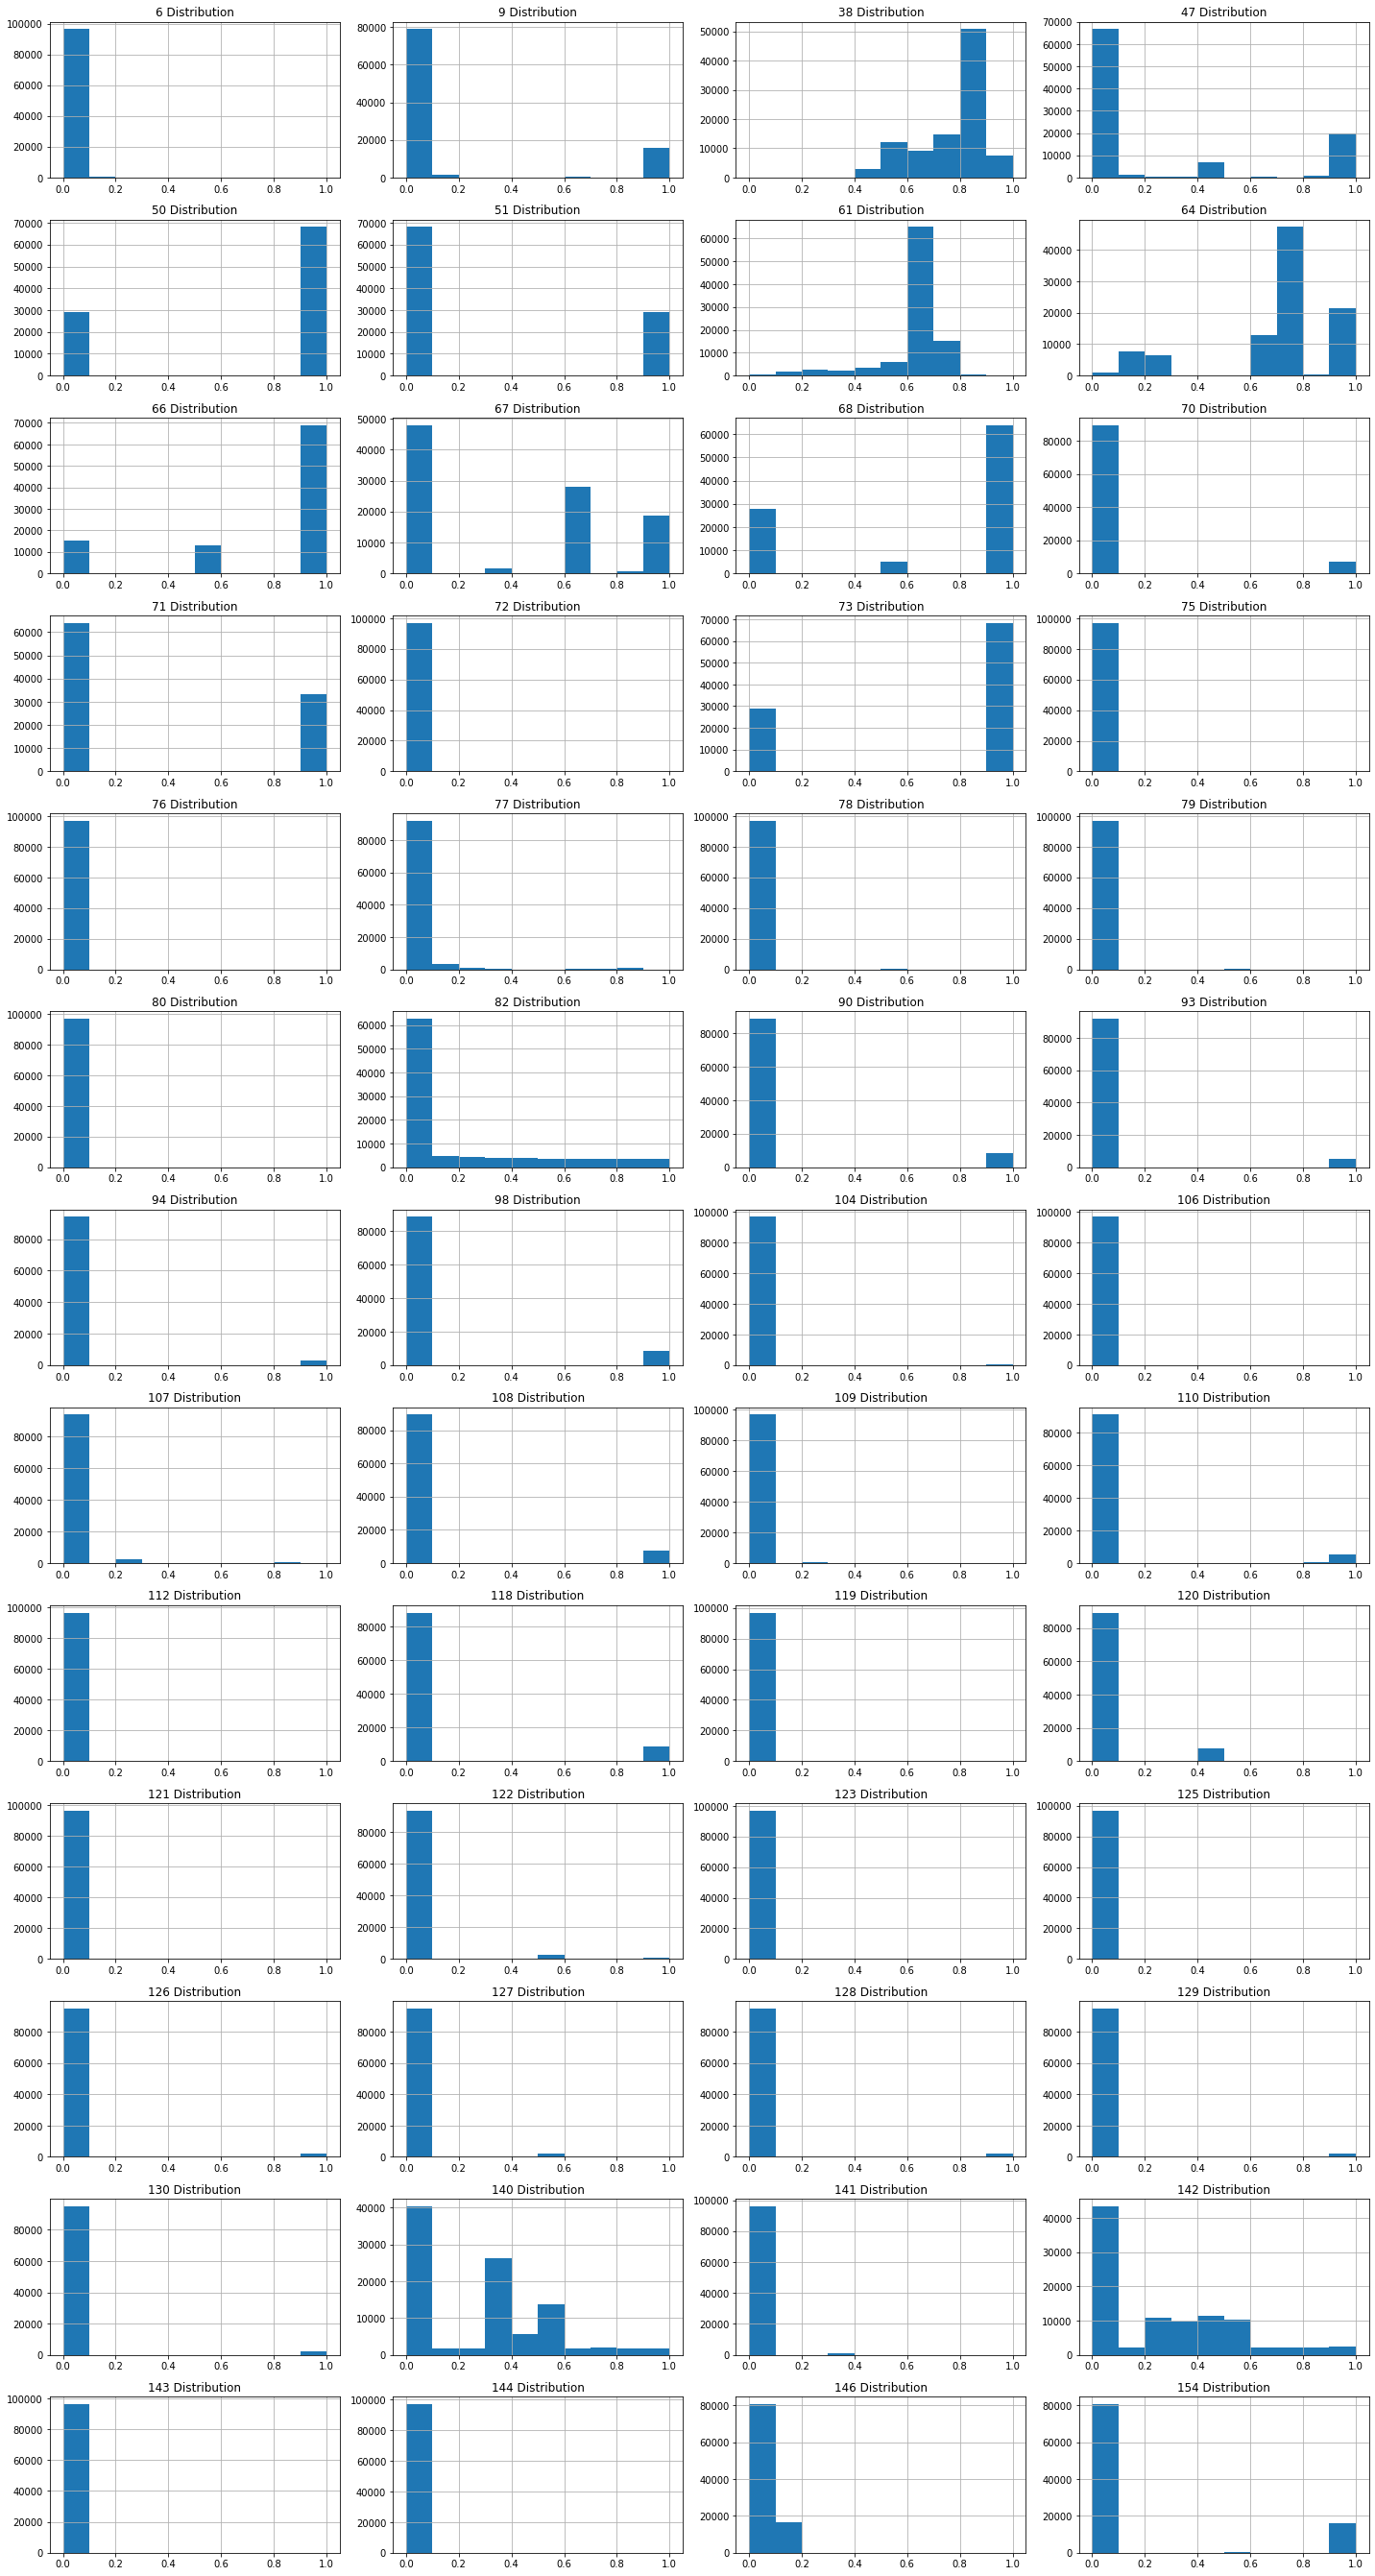

In [97]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,40))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(df_with_rescaled_cols, df_with_rescaled_cols.columns, 14, 4)

### Step 5: Normalise columns with sparse data (i.e. with lots of "0"s)
* Find columns with a high percentage of "0" values, and normalise these columns
* I've set high percentage to be x%, but we are free to amend this later.

In [150]:
# calculate the percentage of rows with "0" as value for each column in the dataframe
# we will normalise the columns with >75% "0"s

from sklearn.preprocessing import Normalizer

perc_of_zeros_by_col = df_with_rescaled_cols.apply(pd.value_counts).iloc[0] / df_with_rescaled_cols.shape[0] * 100
cols_to_normalise = perc_of_zeros_by_col[perc_of_zeros_by_col>75].index
cols_not_normalised = [i for i in df_with_rescaled_cols.columns if i not in cols_to_normalise]

X2 = df_with_rescaled_cols[cols_to_normalise].values
normScaler = Normalizer().fit(X2)
normalizedX = normScaler.transform(X2)

In [158]:
# join the normalised data back to the un-normalised columns, the result is a dataframe df_with_normalised_cols
df_normalised_only = pd.DataFrame(normalizedX,columns=cols_to_normalise)
df_with_normalised_cols = pd.concat([df_normalised_only,df_with_rescaled_cols[cols_not_normalised]],axis=1)

# reorder the columns from smallest to biggest
df_with_normalised_cols = df_with_normalised_cols.reindex(sorted(df_with_normalised_cols.columns, key=lambda x: float(x)), axis=1)
df_with_normalised_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,128,129,130,140,141,142,143,144,146,154
0,0.000064,0.009150,0.394895,0.88679,0,1,0.70423,0.81818,1.0,0.30769,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000012,0.000000,0.394916,0.43396,0,1,0.70423,0.65909,0.5,1.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.036308,0.070588,0.394959,0.00000,1,0,0.59155,0.18182,0.0,0.61538,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005238,0.094771,0.395013,0.00000,1,0,0.14085,0.18182,0.0,0.61538,...,0.295937,0.295937,0.295937,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035887,0.070588,0.395055,0.00000,1,0,0.61972,0.18182,0.0,0.61538,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


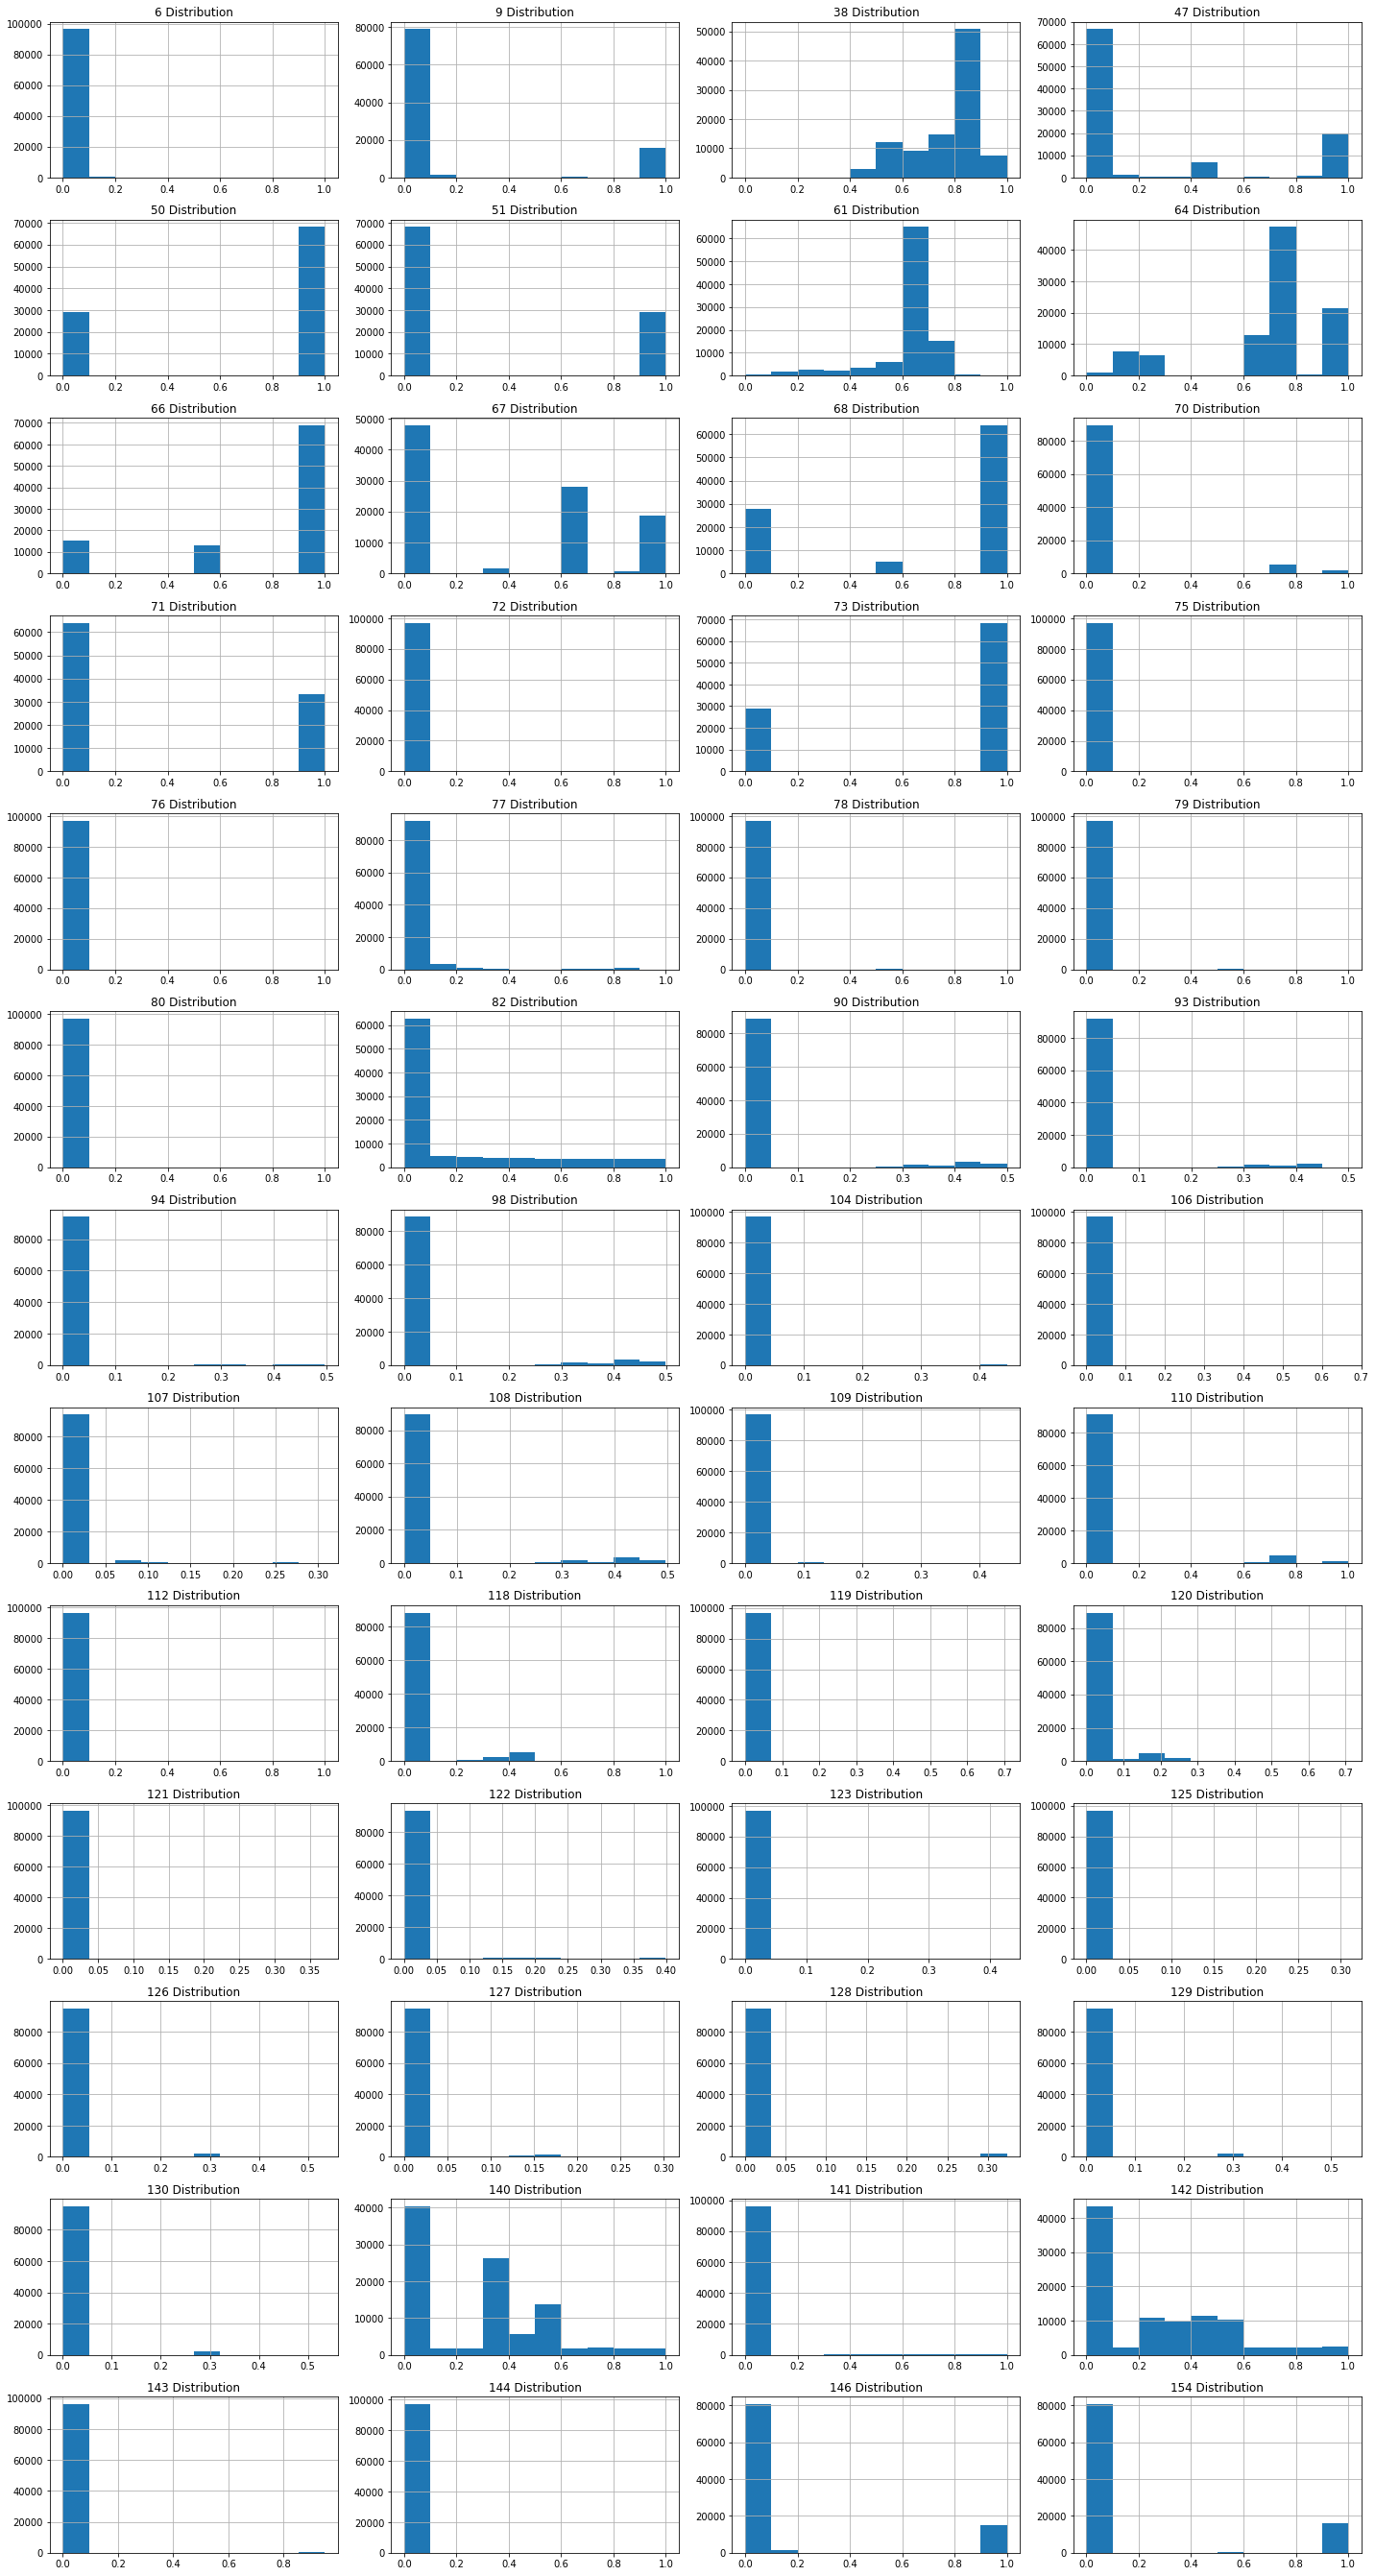

In [160]:
draw_histograms(df_with_normalised_cols, df_with_normalised_cols.columns, 14, 4)

### Step 6: Standardise Data with numpy's `log` transform function
Looking at the charts above, we can see that many of the columns in the current dataframe `df_with_normalised_cols` have very skewed distribution. 

We will use numpy's `log` function here to convert the skewed data. The result is a dataframe called `df_with_log_transformed_cols`
    
Note:
1. We can try other transformation later (e.g. scikit's `StandardScaler` transformation, but I didn't use it here because it would change the scale again.

2. Other potential methods to replace zeros with for log transformation:
    * Add a constant value © to each value of variable then take a log transformation
    * Impute zero value with mean.
    * Take square root instead of log for transformation

In [183]:
# use numpy's log transformation
temp_df = df_with_normalised_cols.apply(lambda x:x+1) 
# do log(x+1) transformation to avoid error created by log transformation i.e. result in infinity
df_with_log_transformed_cols = temp_df.apply(np.log)
df_with_log_transformed_cols.head()

,6,9,38,47,50,51,61,64,66,67,...,128,129,130,140,141,142,143,144,146,154
0,0.000064,0.009109,0.332819,0.634877,0.000000,0.693147,0.533113,0.597836,0.693147,0.268262,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000012,0.000000,0.332834,0.360440,0.000000,0.693147,0.533113,0.506269,0.405465,0.693147,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035664,0.068208,0.332865,0.000000,0.693147,0.000000,0.464708,0.167056,0.000000,0.479570,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005224,0.090545,0.332903,0.000000,0.693147,0.000000,0.131774,0.167056,0.000000,0.479570,...,0.259234,0.259234,0.259234,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035258,0.068208,0.332934,0.000000,0.693147,0.000000,0.482253,0.167056,0.000000,0.479570,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([9.597e+04, 9.270e+02, 1.000e+02, 2.900e+01, 1.200e+01, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([0.        , 0.06931472, 0.13862944, 0.20794415, 0.27725887,
        0.34657359, 0.41588831, 0.48520303, 0.55451774, 0.62383246,
        0.69314718]),
 <a list of 10 Patch objects>)

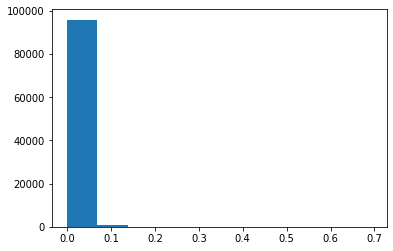

In [186]:
plt.hist(df_with_log_transformed_cols["6"])

In [184]:
# tried this, I didn't go ahead with it because it changed the scales for each columns again. We can try again later.
# from sklearn.preprocessing import StandardScaler

# X3 = df_with_normalised_cols.values
# stdScaler = StandardScaler().fit(X3)
# stdScaledX = stdScaler.transform(X3)
# stdScaledX

# df_stdscaled_cols = pd.DataFrame(stdScaledX,columns=list(df_with_normalised_cols.columns))

# df_stdscaled_cols.head()

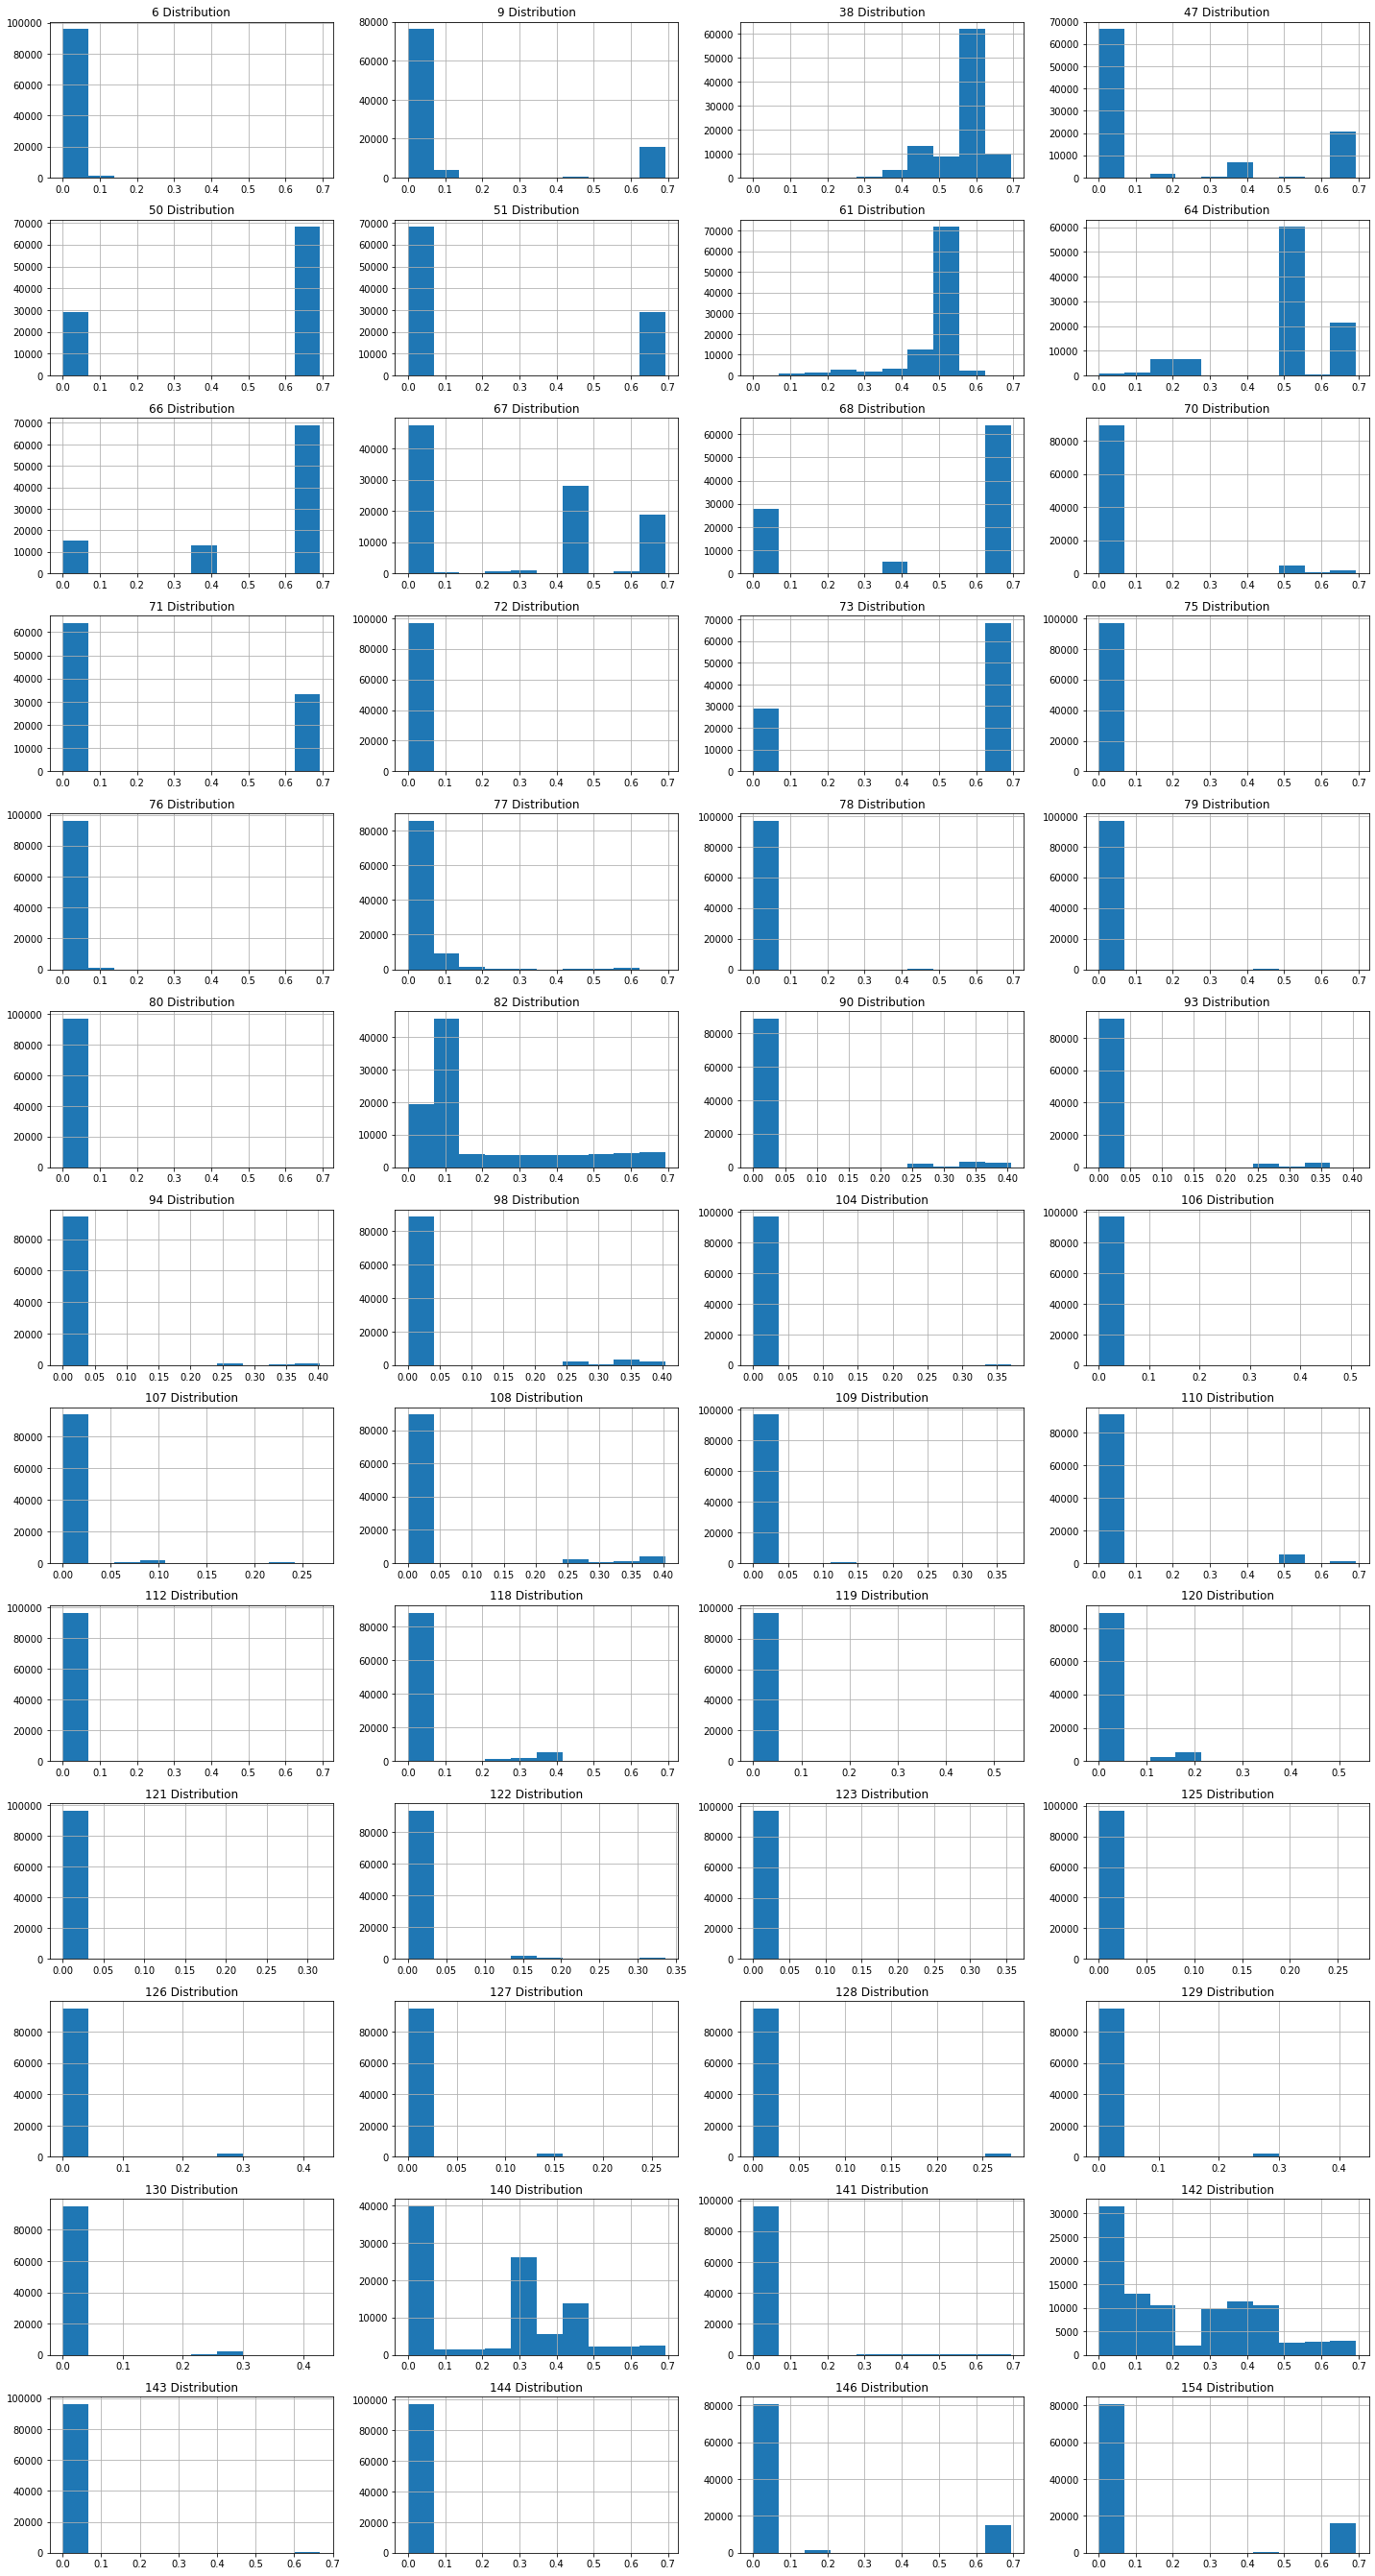

In [185]:
draw_histograms(df_with_log_transformed_cols, df_with_log_transformed_cols.columns, 14, 4)

### Step 7: Discretization with `KBinsDiscretizer` or `Binarizer`
https://scikit-learn.org/stable/modules/preprocessing.html#discretization

## Result
* Number of columns in the original dataset: 153
* Removed x columns from the dataset due to:
  + all rows having the same value, e.g. "0" or "1" (74 in total)
  + insufficient information (i.e. the most frequent value fills > 99.95% of the rows) (22 in total)
  + duplicate columns (3 in total)
* Rescaled x columns to the range (0,1) by using `MinMaxScaler`
* Standarized x columns
* Binarise the following columns

## Further actions:
* Try rescaling with numpy's `log` transformation?